#Natural Language Processing Workshop<br>
##3.0 - Identifying Obesity Using Notes: Optimization Challenge!
###Names<br>10/12/2018
##Objectives
###Participants should be able to:
* Identify key words used to describe obesity
* Determine improvement in performance with *****


In [0]:
# Import libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import tensorflow as tf
import re
import seaborn as sns

# Below imports are used to print out pretty pandas dataframes
from IPython.display import display, HTML

# Imports for accessing Datathon data using Google BigQuery.
from google.colab import auth
from google.cloud import bigquery
from google.colab import files

In [0]:
auth.authenticate_user()

In [0]:
project_id='hst-953-2018'
os.environ["GOOGLE_CLOUD_PROJECT"]=project_id
# Read data from BigQuery into pandas dataframes.
def run_query(query):
  return pd.io.gbq.read_gbq(query, project_id=project_id, verbose=False, configuration={'query':{'useLegacySql': False}})



**Extra Section that should go at the beginning - just to introduce students to the different types of free text notes.**

In [14]:
df_noteevents_categories = run_query('''
SELECT CATEGORY 
FROM `physionet-data.mimiciii_notes.noteevents`
GROUP BY CATEGORY
''')

#Of note, some categories have spaces at the end, like 'Physician '
list_categories = df_noteevents_categories["CATEGORY"].tolist()

print(list_categories)
print(df_noteevents_categories)



['Physician ', 'Radiology', 'Discharge summary', 'Echo', 'ECG', 'Nursing/other', 'General', 'Rehab Services', 'Pharmacy', 'Case Management ', 'Respiratory ', 'Nutrition', 'Nursing', 'Consult', 'Social Work']
             CATEGORY
0          Physician 
1           Radiology
2   Discharge summary
3                Echo
4                 ECG
5       Nursing/other
6             General
7      Rehab Services
8            Pharmacy
9    Case Management 
10       Respiratory 
11          Nutrition
12            Nursing
13            Consult
14        Social Work


In [0]:
#This query pulls information from the derived table, height_weight.  It only uses first_height and first_weight if available.
#Patients with BMIs that are greater than or equal to 30 are categorized as obese (obese_1 = 1) which is the official definition of obese
#Obese Class 1 = 30-34.99
#Obese Class 2 = 35-39.99
#Obese Class 3 = >=40
df_bmi = run_query('''
With tt AS(
SELECT hw.icustay_id, subject_id, cast(hw.height_first as float64) as height_first, cast(hw.weight_first as float64) as weight_first
, (cast(hw.weight_first as float64))/(cast(hw.height_first as float64)/100* cast(hw.height_first as float64)/100) AS BMI
FROM `physionet-data.mimiciii_derived.heightweight` as hw
WHERE height_first is not null and weight_first is not null
)
SELECT *
, CASE WHEN (tt.bmi >= 30) THEN 1 ELSE -1 END as obese_1
FROM tt
WHERE BMI >=18.5 and BMI <= 50 and height_first >=120 AND height_first<=213 AND weight_first >40
ORDER BY tt.bmi
''')

In [57]:
print(df_bmi["BMI"])

0        18.503251
1        18.503251
2        18.505139
3        18.507500
4        18.513926
5        18.513926
6        18.516311
7        18.523450
8        18.523450
9        18.526664
10       18.540030
11       18.542518
12       18.542518
13       18.543147
14       18.548424
15       18.550050
16       18.557063
17       18.557063
18       18.557063
19       18.557063
20       18.570539
21       18.570539
22       18.571749
23       18.576558
24       18.576558
25       18.580359
26       18.589619
27       18.591426
28       18.600037
29       18.604060
           ...    
12276    48.820116
12277    48.829683
12278    48.834376
12279    49.030710
12280    49.030710
12281    49.035592
12282    49.141534
12283    49.153552
12284    49.153552
12285    49.159862
12286    49.159862
12287    49.184748
12288    49.194434
12289    49.194766
12290    49.298710
12291    49.334589
12292    49.409701
12293    49.485501
12294    49.510263
12295    49.567658
12296    49.661901
12297    49.

(array([ 422., 1021., 1631., 1930., 1799., 1593., 1180.,  824.,  632.,
         384.,  283.,  216.,  161.,  110.,   65.,   55.]),
 array([18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50]),
 <a list of 16 Patch objects>)

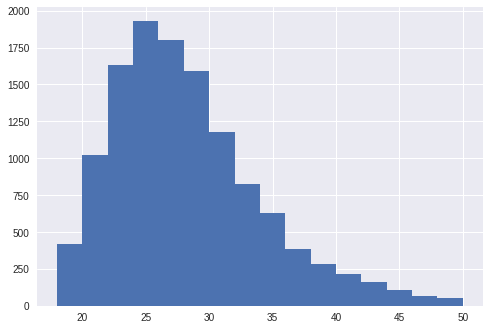

In [58]:
df_plot = df_bmi["BMI"]


#plot(df_plot)
plt.hist(df_plot, bins=range(18, 52, 2))